## Support Vector Machine
Classificazione e predizione tramite un modello **SVM** di tipo 'One-vs-Rest'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ssc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings('ignore')

#
# Acquisizione dei dati per la creazione del training e del testing set
#

dataframe = pd.read_csv('../CSVfile/CSVfile_sintesi/main_dataframe.csv', index_col=0)

y = dataframe["('a', '', '')"].to_numpy().astype(int)

dataframe = pd.read_csv('../CSVfile/CSVfile_sintesi/Clean_data/clean_dataframe.csv', index_col=0)

X = dataframe.to_numpy()


print(X)
print(y)

[[9.3597568  0.2930349  7.9657     ... 0.25292    0.25573    0.26254   ]
 [9.455824   0.80665028 8.0414     ... 0.47346    0.58879    0.66169   ]
 [9.41374    0.39029712 8.5235     ... 0.24267    0.31182    0.4589    ]
 ...
 [9.1870416  2.75688427 3.7657     ... 0.048946   0.094196   0.15939   ]
 [9.278632   2.81766201 3.601      ... 0.030437   0.082306   0.11026   ]
 [9.3281832  2.64756649 3.1719     ... 0.060994   0.11191    0.16897   ]]
[ 8  8  8 ... 14 14 14]


In [11]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) 

In [12]:
X_train = ssc().fit_transform(X_train)
X_test = ssc().fit_transform(X_test)

In [13]:
print("X_train row: {}\nX_train_col: {}\n\nX_test row: {}\nX_test col:{}\n\nTotal rows:{}\nTotal cols:{}"\
      .format(X_train.shape[0],X_train.shape[1],X_test.shape[0],X_test.shape[1],X_train.shape[0]+X_test.shape[0],\
             X_train.shape[1]))

X_train row: 7296
X_train_col: 315

X_test row: 1824
X_test col:315

Total rows:9120
Total cols:315


In [14]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
svm_model = SVC()

ovr_classifier = OneVsRestClassifier(svm_model)
ovr_classifier = ovr_classifier.fit(X_train, y_train)

y_predicted_train = ovr_classifier.predict(X_train)
y_predicted_test = ovr_classifier.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train, average=None)
training_precision = precision_score(y_train, y_predicted_train, average=None)
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test, average=None)
testing_precision = precision_score(y_test, y_predicted_test, average=None)

accuracy = pd.DataFrame(data={'ACC':[training_acc, testing_acc], 'BA':[training_ba, testing_ba]},\
                       index=['training', 'testing'])
print(accuracy)
print()
trr = pd.DataFrame(data=training_recall, index=list(range(1,20)), columns=['Training RECALL']).transpose()
trr.columns.name='Class'
print(trr)
print()
print()
trp = pd.DataFrame(data=training_precision, index=list(range(1,20)), columns=['Training PRECISION']).transpose()
trp.columns.name='Class'
print(trp)
print()
print()
ter = pd.DataFrame(data=testing_recall, index=list(range(1,20)), columns=['Testing RECALL']).transpose()
ter.columns.name='Class'
print(ter)
print()
print()
tep = pd.DataFrame(data=testing_precision, index=list(range(1,20)), columns=['Testing PRECISION']).transpose()
tep.columns.name='Class'
print(tep)

               ACC        BA
training  0.972725  0.972684
testing   0.966557  0.966713

Class             1    2    3    4    5         6         7         8   \
Training RECALL  1.0  1.0  1.0  1.0  1.0  0.989796  0.864721  0.809278   

Class                  9         10        11   12        13        14  \
Training RECALL  0.940415  0.997436  0.940104  1.0  0.997403  0.994695   

Class                  15        16   17   18        19  
Training RECALL  0.997423  0.973475  1.0  1.0  0.976253  


Class                1      2    3    4         5         6         7   \
Training PRECISION  1.0  0.825  1.0  1.0  0.931204  0.997429  0.913165   

Class                     8         9         10        11        12   13  \
Training PRECISION  0.954407  0.986413  0.946472  0.997238  0.994624  1.0   

Class                     14   15   16        17        18        19  
Training PRECISION  0.989446  1.0  1.0  0.997423  0.997347  0.989305  


Class            1    2    3    4    5         6

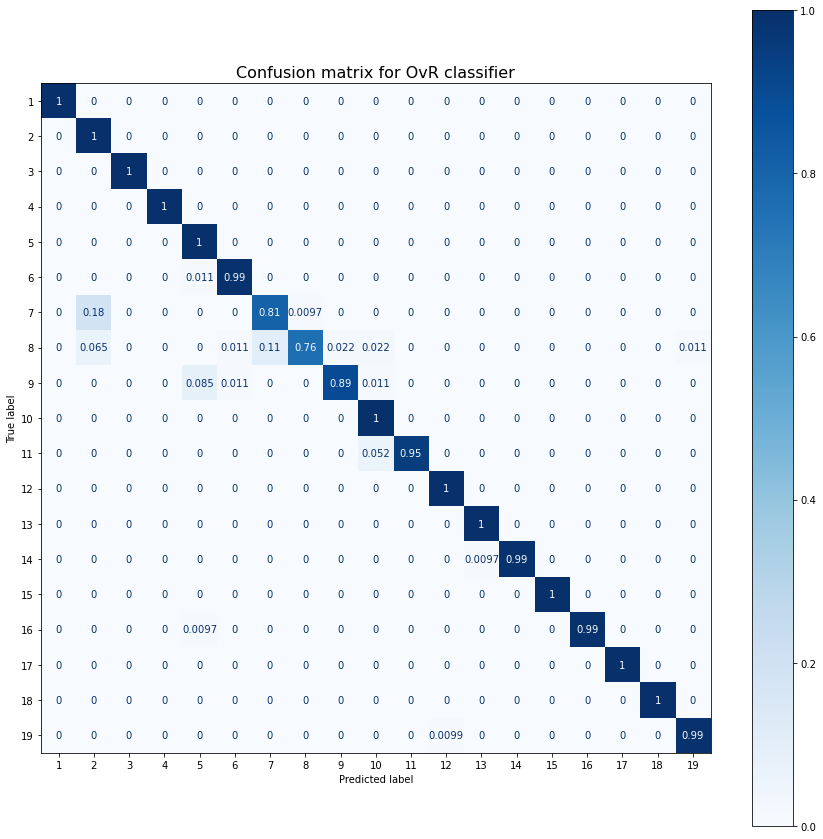

In [15]:
#
# Valutazione per mezzo di una matrice di confusione
#

plt.rcParams["figure.figsize"] = (15,15)
matrix = plot_confusion_matrix(ovr_classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.title('Confusion matrix for OvR classifier', size=16)
plt.show(matrix)
plt.show()   

Text(0.5, 1.0, 'SVM Decision Region Boundary')

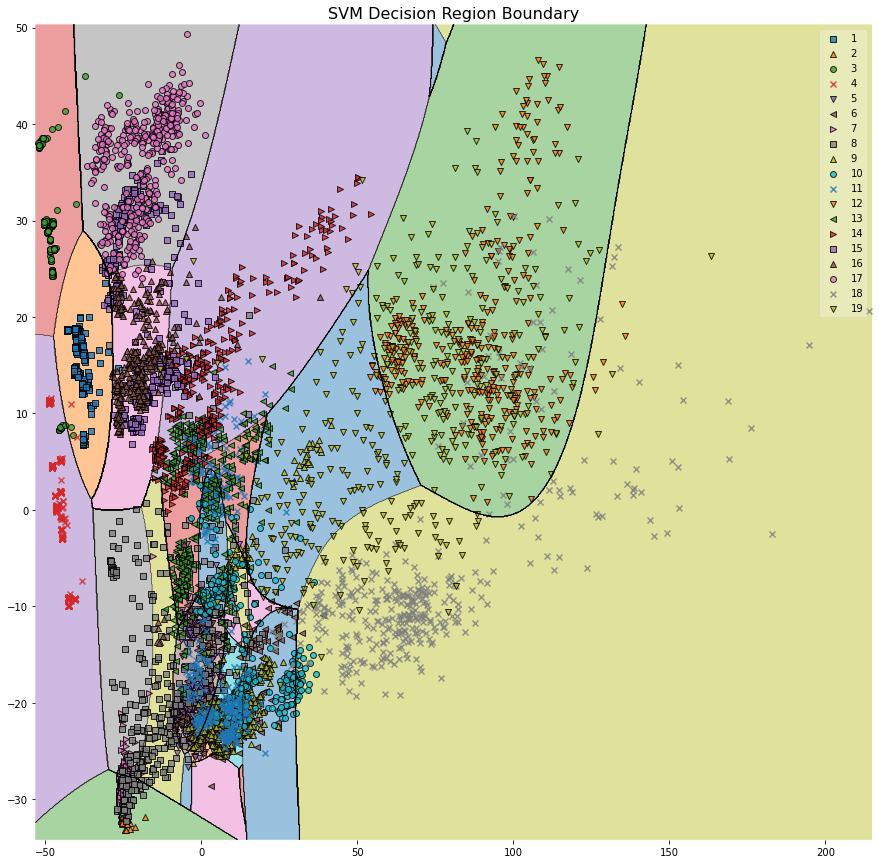

In [16]:
clf = OneVsRestClassifier(svm_model)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=1)

plt.title('SVM Decision Region Boundary', size=16)